In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

# Decision trees

Asking questions is a great way to get information about something that you're trying to identify. There are several classic games based on this process, like 20 questions and Guess who. In these games, you're usually asking questions to a _person_. But you can also ask questions about a _dataset_. For example, does an observation have this particular feature? Is its value above a specific threshold? Each question that you ask gives you more information about the observation that you're investigating.

This kind of process is the basis of a genre of model called *decision trees*, which you'll learn about in this lesson.

## Learning from questions

To explore this concept further, take a look at an abstract example. Imagine that you have users in eight different cities: San Francisco, Paris, Cairo, Beijing, Sydney, New Delhi, Chicago, and Johannesburg. If you're trying to figure out where a user is, there are several questions that you could ask to get information about their location. You could ask if they're in the northern or southern hemisphere, or if they're on an ocean or not. Each answer can further refine the possible outcomes.

Look at the example of a decision tree below.

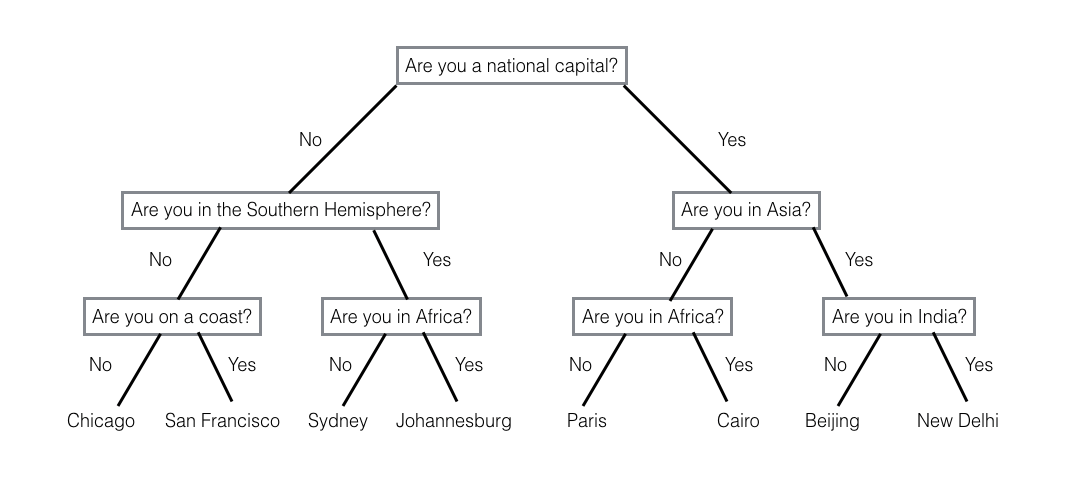

Take a moment now to learn a bit of terminology. In this example, each of the questions is a *node*. Nodes are either *root nodes* (the first node), *interior nodes* (follow-up questions), or *leaf nodes* (endpoints). Every node except for leaf nodes contains a *rule*, which is the question that you're asking. The links between nodes are called *branches* or *paths*. When put in terms of flow, you start at the root node and follow branches through interior nodes until you arrive at a leaf node. The whole thing would look much more like a tree if you turned it upside down, with the root at the bottom and the leaves and branches higher up, but this is the conventional way to represent a tree.

Each rule divides the data into a certain number of subgroups. Typically, the data is divided into two subgroups, and binary yes-or-no questions are particularly common. It is important to note that all data has to have a way to flow through the tree; it cannot simply disappear or not be contained in the tree.

Through a series of questions, you're able to gain information about where the user is. You narrow down the possible number of questions each time and ultimately arrive at an answer. This is basically all that a decision tree is: a series of rules to arrive at a conclusion.

## Entropy

When designing a decision tree, you want your tree to be as efficient as possible. It's logical that not all questions consist of the same amount of information. Using the example above, if you were to ask which users were in Norway, that would be a pretty useless question. You would gain no information from the answer.

Evaluating questions, or nodes, requires you to use two additional concepts from a field known as *information theory*. These concepts are *information gain* and *entropy*.

*Entropy* is a term that you may be familiar with from other disciplines, particularly the sciences, where it means disorder. Here, it will mean something along the lines of uncertainty. It can be defined, using Shannon Entropy $H$, as follows:

$$ H = -\sum_{i=1}^n P(x_i)log_2 P(x_i) $$


This equation corresponds to the weighted sum of log base 2 of the probabilities of all outcomes. The important thing to take away here is that this is a measure of uncertainty in the outcome. As you limit the possible number of outcomes and become more confident in the outcome, the entropy decreases. An area of the tree with only one possible outcome has zero entropy because there is no uncertainty. To delve into the reason for the logarithmic term here would require a deeper dive into information theory than you'll do in this program, but you can find an explanation of it in this [primer on Shannon Entropy](https://arxiv.org/pdf/1405.2061.pdf).

You can then use entropy to measure the *information gain*, defined as the change in entropy from the original state to the weighted potential outcomes of the following state.

One method of designing an efficient decision tree is to gain the most information as quickly as possible.

## Coded example

To see how to implement this in Python using scikit-learn, go through an example. Imagine that you're interested in whether a customer is likely to come back within 30 days. You have a snapshot of the customer base from some moment more than thirty days in the past. For each customer, you know the purchase amount, the number of items purchased, if they used a promo on their purchase, if they're subscribed to the email list, and the number of times that they have made a purchase.

Because it's historical data, you also have a repeat variable for whether they were a repeat customer in the next thirty days from when the snapshot was taken.

In [2]:
# Set up all the data in a couple of DataFrames
customers = pd.DataFrame()
customers['purchases_amount'] = [105, 65, 89, 99, 149, 102, 34, 120, 129, 39,
                                 20, 30, 109, 40, 55, 100, 23, 20, 70, 10]
customers['purchases_items'] = [1, 4, 5, 4, 7, 1, 2, 10, 6, 5,
                                1, 3, 2, 1, 5, 10, 3, 3, 1, 1]
customers['promo'] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
                      1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
customers['email_list'] = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
                           0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
customers['checkouts'] = [1, 5, 3, 3, 1, 2, 4, 4, 1, 1,
                          1, 1, 2, 4, 1, 1, 2, 1, 1, 1]

repeat_customer = pd.DataFrame()
repeat_customer['repeat'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                             0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

This visualization uses two packages that you may not have used before: PyDotPlus and GraphViz. If you don't already have these packages, install them now. You can install PyDotPlus with `pip install pydotplus`. The method that you use to install GraphVizwill depend on the operating system that you're using. If you're on a Windows machine with Anaconda, run `conda install -c anaconda graphviz` or `conda install python-graphviz`, or [install from their website](http://www.graphviz.org/Download.php). If you're on a Mac, run `brew install graphviz`. And if you're on Linux, install with your package manager. Here is [the relevant documentation](http://pydotplus.readthedocs.io/reference.html) if you'd like to read up on these tools.

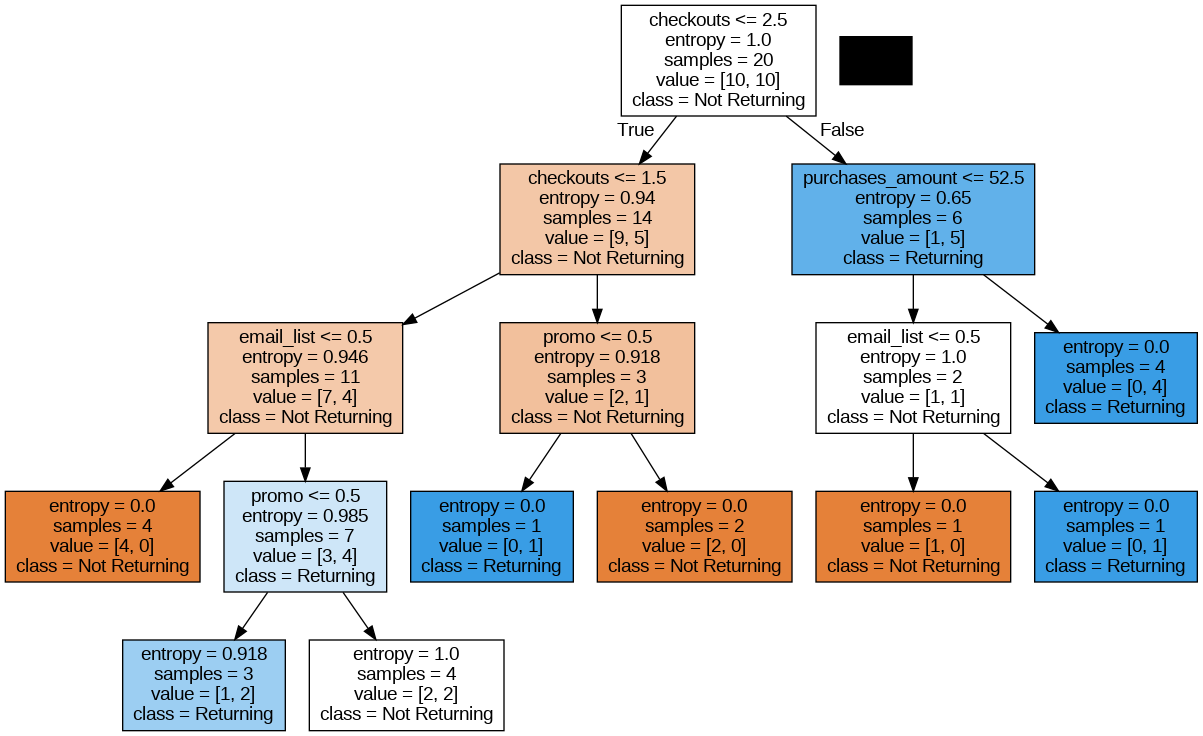

In [3]:
# This is the model that you'll be using
from sklearn import tree

# A convenience for displaying visualizations
from IPython.display import Image

# Packages for rendering the tree
import pydotplus
import graphviz

# Initialize and train the tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(customers, repeat_customer)

# Render the tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Above, you have a visualization of the tree that you've trained. For every node, it shows the rule being applied, the entropy in the dataset (`1` being the most uncertain, `0` being totally certain), the samples remaining, the distribution of those samples, and the dominant class.

You can also follow trees. As you move down a tree to the left, you are meeting the rule. And as you move down to the right, you are outside of the rule. So in the branches below the root node, all nodes to the left have a `checkouts` value less than or equal to `2.5`, and all the nodes to the right have a `checkouts` value that _isn't_ less than or equal to `2.5`. You can follow this all the way down the tree, and the same is true for each new rule introduced at each node.

Note that a few parameters were set when the tree was initialized. Entropy was used to build the tree (`criterion='entropy'`); this approach follows the method described above of looking for information gain. The `max_features` parameter was set to `1`, so only one feature will be used per node. And the `max_depth` of the tree was set to `4`, which means that you only have four decision levels below the root for the classification.

Note that something was done in this example that you wouldn't ever do when using decision trees for real: `random_state` was set to an arbitrary integer (`1337`). This classifier works by repeatedly splitting the training data randomly, which can lead to inconsistent trees. For this example, the random seed was set so that the tree would look a specific way—but you won't do that when you're actually using this model.

## Why decision trees?

There are several reasons that someone would want to use a decision tree. Here are some of the benefits:

* Easy to represent the model visually
* Can handle varied types of data
* Feature selection is a part of the model
* Easy to use with minimal data preparation

However, there are some key downsides to be aware of. Firstly, there is a randomness to their generation, which can lead to variance in estimates. There isn't a hard and fast rule to how the tree is built, so it doesn't build the same way every time. You saw this above when the `random_state` argument was discussed. In addition, they are incredibly prone to overfitting, particularly if you allow them to grow too deep or complex. Also, note that because they are working from information gain, they are biased toward the dominant class—so balanced data is needed.

You used decision trees here as a classifier. You can also use them for regression; next, you'll learn about a regression version, which follows the same principles.

### Tinker

Spend a few minutes tinkering with this example and the arguments that you pass into the model above. Remove the `random_state` argument and regenerate the tree a few times to see how random splitting changes your result. Change your `max_depth` to see how that affects things. Make sure that you fully understand what each parameter does and what the tradeoffs are.

### Increase Max Depth to 20

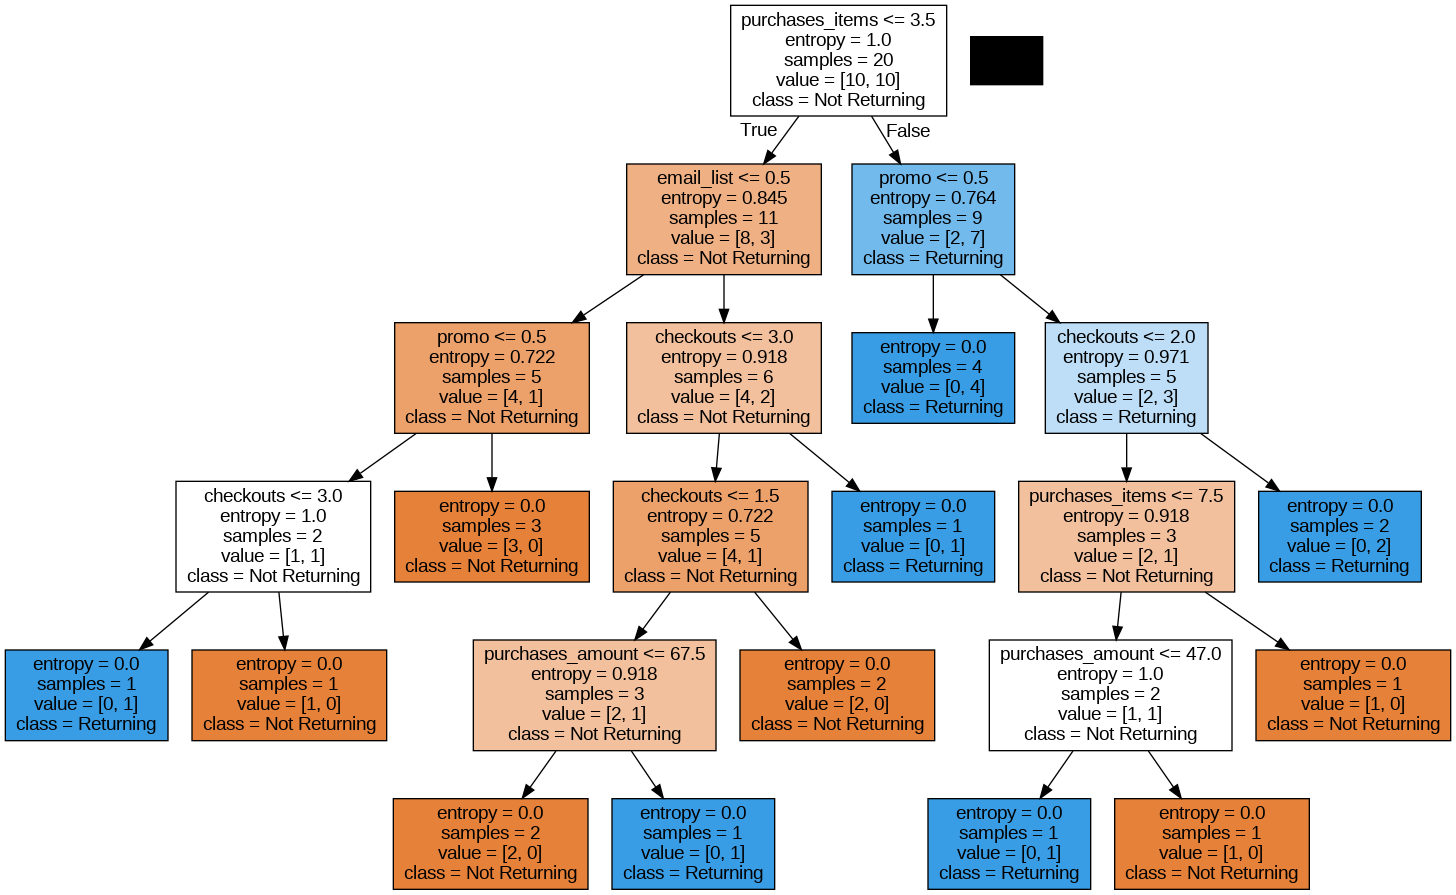

In [9]:
# Increasing max depth to 20

# Initialize and train the tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=20,
)
decision_tree.fit(customers, repeat_customer)

# Render the tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

I am unable to generate a tree with a tree with a depth greater than 7. We can see that as we go down approximately 5 or 6 nodes from the parent node, all of the child nodes have zero entrophy. Therefore, we gain more and more information as the entrophy decreases to zero.

### Increase Max Depth to 20 and use 2 features

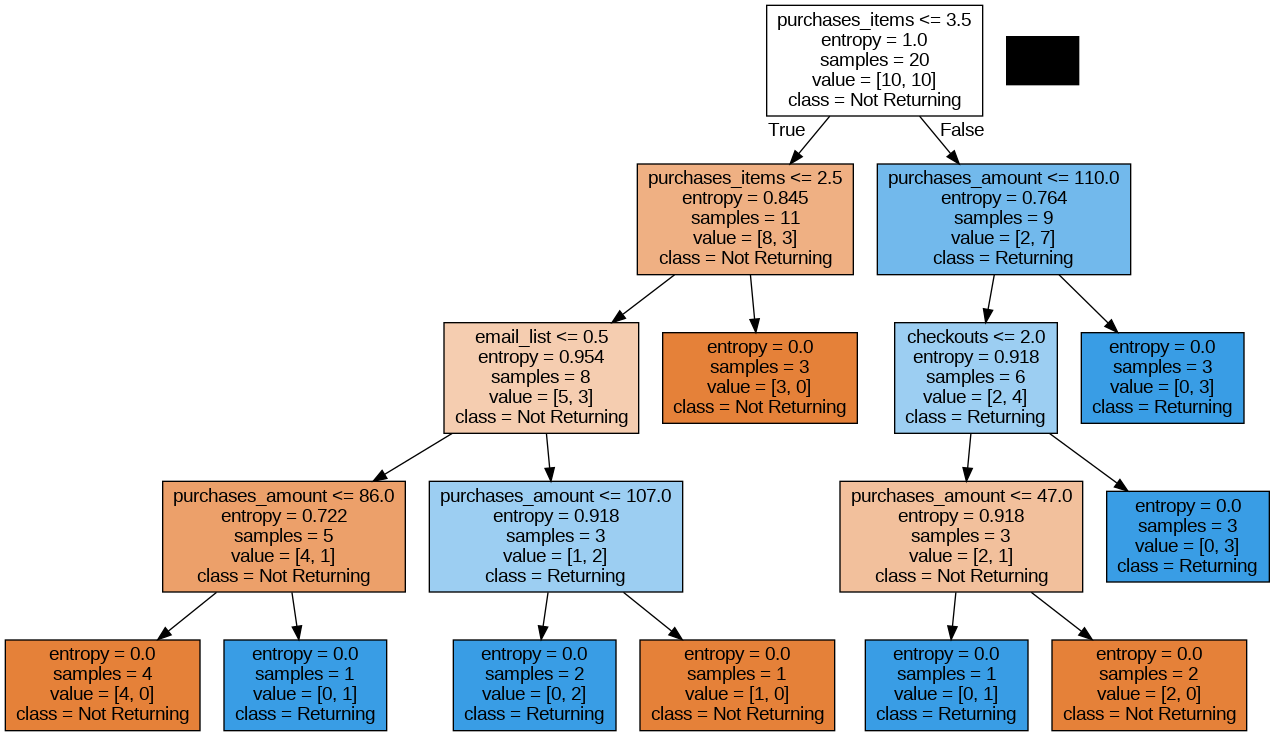

In [15]:
# Increasing max depth to 20 while using 2 features

# Initialize and train the tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=20,
)
decision_tree.fit(customers, repeat_customer)

# Render the tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Not we see that the decision tree gets descends to the root node faster and that entrophy decreases consistently to zero across root nodes at a dept of 4.

# Increase Max Depth to 20, use 2 featues, and Gini criteria

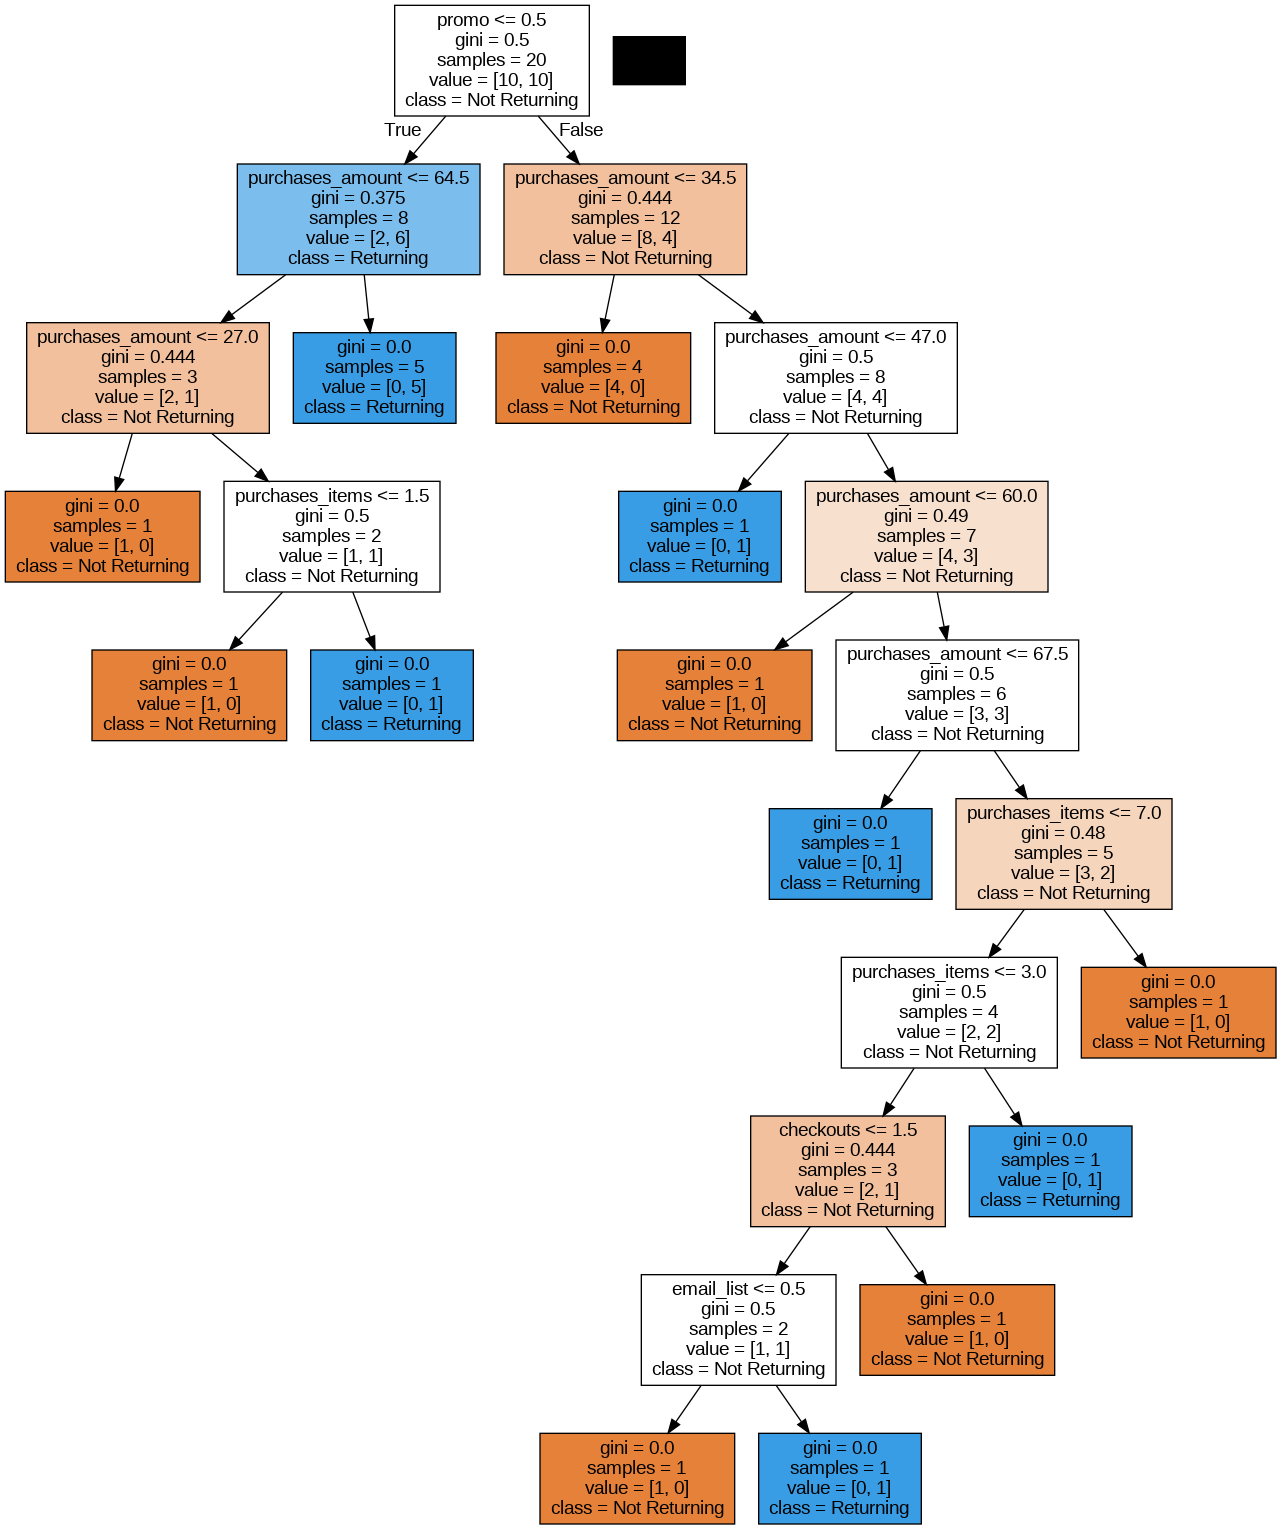

In [17]:
# Increasing max depth to 20 while using 2 features and Gini criteria

# Initialize and train the tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    max_features=2,
    max_depth=20,
)
decision_tree.fit(customers, repeat_customer)

# Render the tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Instead of aiming for zero entrophy we now look at the gini clasification criteria. If a target is a classification outcome taking on values $0,1,\ldots,K-1$, for node , let

$$ p_{mk} = \frac{1}{n_m} \sum_{y\in Q_m} I(y=k)$$
be the proportion of class $k$ observations in node $m$. If $m$ is a terminal node, prediction probability for this region is set to $p_{mk}$. The measured impurity we are using is
$$ H(Q_m) = \sum_k p_{mk}\left(1-p_{mk}\right)$$
which us known as the Gini criterion. We can see that we now reach a depth of 9 from the root node.

# Increase Max Depth to 20, use 2 featues, and log_loss criteria

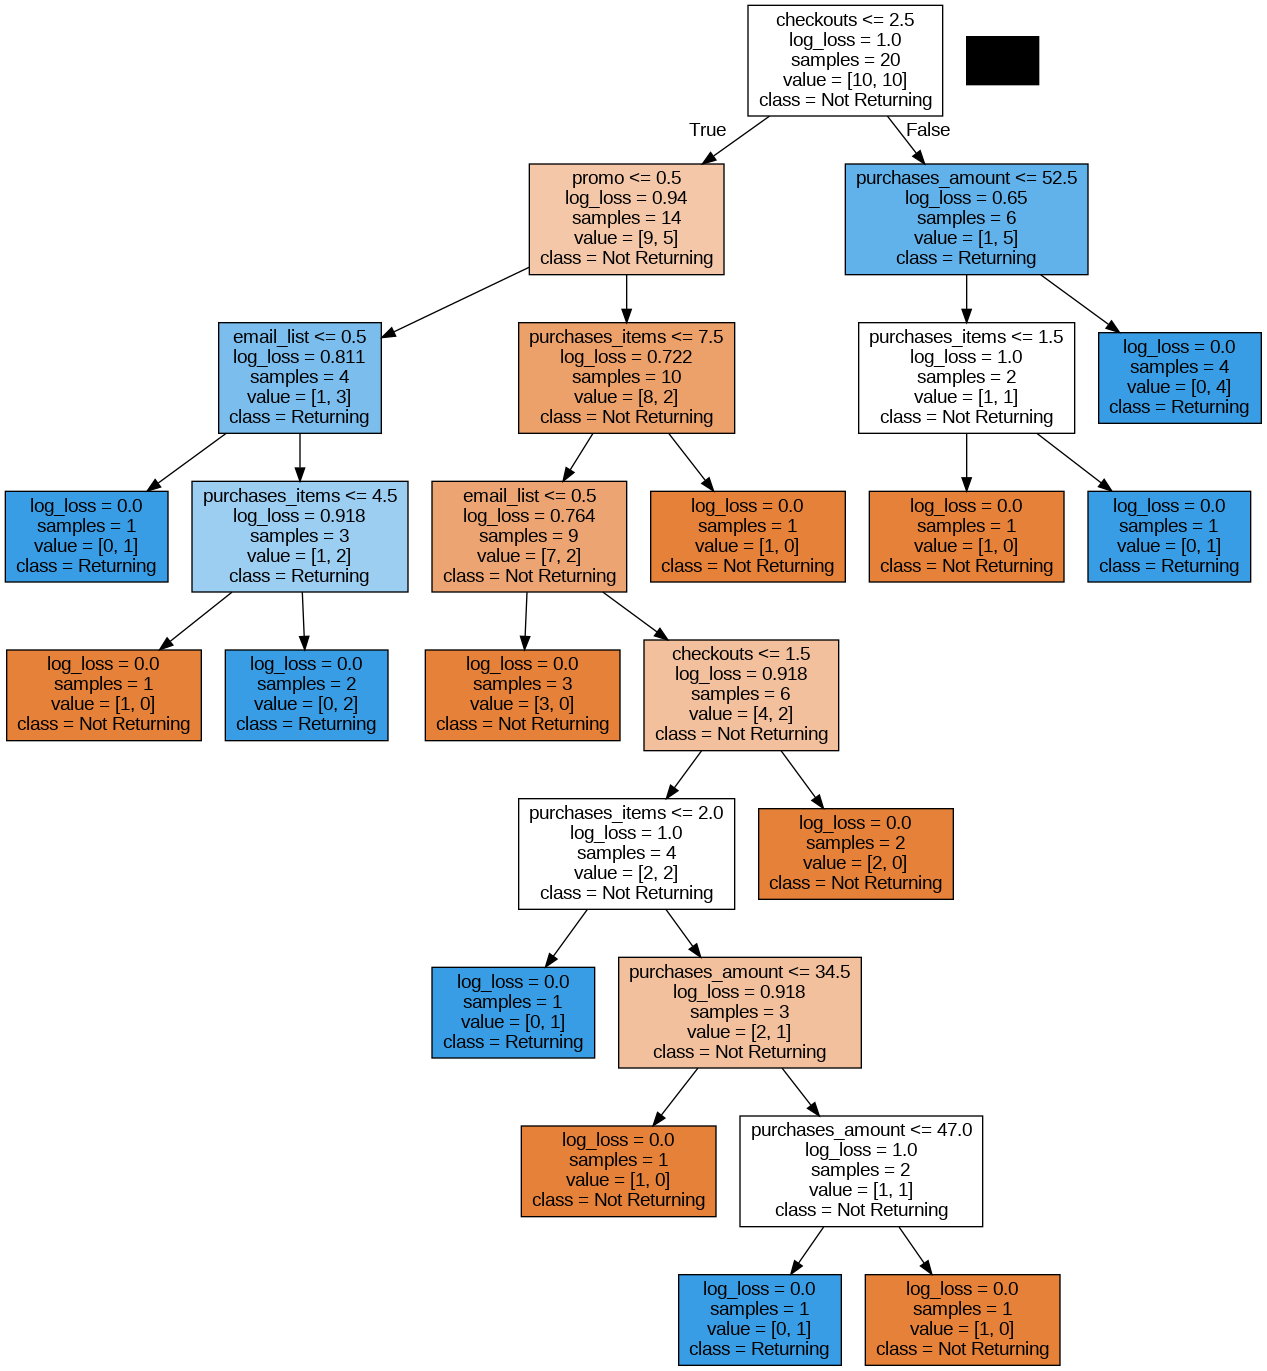

In [19]:
# Increasing max depth to 20 while using 2 features and Log Loss criteria

# Initialize and train the tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='log_loss',
    max_features=2,
    max_depth=20,
)
decision_tree.fit(customers, repeat_customer)

# Render the tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

We now measure impurity through

$$ H(Q_m) = -\sum_k p_{mk}\log(p_{mk})$$

which us known as the Log Loss criterion. As before, we reach a significant depth from the root node.